# Autour du SARS-COV-2 Reproduction des courbes du SCMP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline
plt.rcParams["figure.figsize"]=10,10

## Données

Les données seront celles rendues disponibles par [JHU CSSE](https://systems.jhu.edu/) sur github dans [ce dépot](https://github.com/CSSEGISandData/COVID-19).

Nous nous intéressons en particulier aux données à l'echelle mondiale des cas confirmés.
L'objectif final est de reproduire les courbes du South China Morning Post de cette page : [The Coronavirus Pandemic](https://www.scmp.com/coronavirus?src=homepage_covid_widget)

### Téléchargement des données

Les données sont téléchargées dans le dossier courant si aucune donnée n'est présente. Sinon elles sont recupérées du dossier courant.
La structure choisie ensuite est une structure classique du module pandas.

In [2]:
data_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_file = "time_series_covid19_confirmed_global.csv"

try :
    open(data_file, 'r')
    
except :
    print("Data file not found, dowloading from {}".format(data_link))
    urllib.request.urlretrieve(data_link, data_file)

raw_data = pd.read_csv(data_file)

In [3]:
raw_data

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

En premier lieu, nous voulons faire l'étude pour la liste de pays suivante :
- Belgique
- France
- Chine
- Allemagne
- Iran
- Italie
- Japon
- Corée du Sud
- Pays Bas
- Portugal
- Espagne
- Royaume uni
- Etats Unis

La selection des pays se fait avec la fonction `isin` après la définition de la liste des pays d'interets.

In [4]:
listePays = [
    "Belgium",
    "France",
    "China",
    "Germany",
    "Iran",
    "Italy",
    "Japan",
    "Korea, South",
    "Netherlands",
    "Portugal",
    "Spain",
    "United Kingdom",
    "US"]
donnees_pays_interets = raw_data[raw_data["Country/Region"].isin(listePays)]
donnees_pays_interets

Province/State  Country/Region      Lat      Long  \
23                                NaN         Belgium  50.8333    4.0000   
49                              Anhui           China  31.8257  117.2264   
50                            Beijing           China  40.1824  116.4142   
51                          Chongqing           China  30.0572  107.8740   
52                             Fujian           China  26.0789  117.9874   
53                              Gansu           China  37.8099  101.0583   
54                          Guangdong           China  23.3417  113.4244   
55                            Guangxi           China  23.8298  108.7881   
56                            Guizhou           China  26.8154  106.8748   
57                             Hainan           China  19.1959  109.7453   
58                              Hebei           China  39.5490  116.1306   
59                       Heilongjiang           China  47.8620  127.7615   
60                              Henan           China  33.8820  113.6140   
61                          Hong Kong           China  22.3000  114.2000   
62                              Hubei           China  30.9756  112.2707   
63                              Hunan           China  27.6104  111.7088   
64                     Inner Mongolia           China  44.0935  113.9448   
65                            Jiangsu           China  32.9711  119.4550   
66                            Jiangxi           China  27.6140  115.7221   
67                              Jilin           China  43.6661  126.1923   
68                           Liaoning           China  41.2956  122.6085   
69                              Macau           China  22.1667  113.5500   
70                            Ningxia           China  37.2692  106.1655   
71                            Qinghai           China  35.7452   95.9956   
72                            Shaanxi           China  35.1917  108.8701   
73                           Shandong           China  36.3427  118.1498   
74                           Shanghai           China  31.2020  121.4491   
75                             Shanxi           China  37.5777  112.2922   
76                            Sichuan           China  30.6171  102.7103   
77                            Tianjin           China  39.3054  117.3230   
..                                ...             ...      ...       ...   
112                           Reunion          France -21.1351   55.2471   
113                  Saint Barthelemy          France  17.9000  -62.8333   
114                         St Martin          France  18.0708  -63.0501   
115                        Martinique          France  14.6415  -61.0242   
116                               NaN          France  46.2276    2.2137   
120                               NaN         Germany  51.0000    9.0000   
133                               NaN            Iran  32.0000   53.0000   
137                               NaN           Italy  43.0000   12.0000   
139                               NaN           Japan  36.0000  138.0000   
143                               NaN    Korea, South  36.0000  128.0000   
166                             Aruba     Netherlands  12.5186  -70.0358   
167                           Curacao     Netherlands  12.1696  -68.9900   
168                      Sint Maarten     Netherlands  18.0425  -63.0548   
169                               NaN     Netherlands  52.1326    5.2913   
184                               NaN        Portugal  39.3999   -8.2245   
201                               NaN           Spain  40.0000   -4.0000   
217                           Bermuda  United Kingdom  32.3078  -64.7505   
218                    Cayman Islands  United Kingdom  19.3133  -81.2546   
219                   Channel Islands  United Kingdom  49.3723   -2.3644   
220                         Gibraltar  United Kingdom  36.1408   -5.3536   
221                       Isle of Man  United Kingdom  54.2361   -4.548

Nous filtrons les données de lattitude et longitude qui ne sont pas utiles pour cette étude gtace à la fonction `drop`. Nous vérifions que les clés existent bien.

In [5]:
try :
    donnees_pays_interets = donnees_pays_interets.drop(columns = ["Lat", "Long"])
except KeyError:
    print("Les clés ont déja été supprimées")
donnees_pays_interets

Province/State  Country/Region  1/22/20  1/23/20  \
23                                NaN         Belgium        0        0   
49                              Anhui           China        1        9   
50                            Beijing           China       14       22   
51                          Chongqing           China        6        9   
52                             Fujian           China        1        5   
53                              Gansu           China        0        2   
54                          Guangdong           China       26       32   
55                            Guangxi           China        2        5   
56                            Guizhou           China        1        3   
57                             Hainan           China        4        5   
58                              Hebei           China        1        1   
59                       Heilongjiang           China        0        2   
60                              Henan           China        5        5   
61                          Hong Kong           China        0        2   
62                              Hubei           China      444      444   
63                              Hunan           China        4        9   
64                     Inner Mongolia           China        0        0   
65                            Jiangsu           China        1        5   
66                            Jiangxi           China        2        7   
67                              Jilin           China        0        1   
68                           Liaoning           China        2        3   
69                              Macau           China        1        2   
70                            Ningxia           China        1        1   
71                            Qinghai           China        0        0   
72                            Shaanxi           China        0        3   
73                           Shandong           China        2        6   
74                           Shanghai           China        9       16   
75                             Shanxi           China        1        1   
76                            Sichuan           China        5        8   
77                            Tianjin           China        4        4   
..                                ...             ...      ...      ...   
112                           Reunion          France        0        0   
113                  Saint Barthelemy          France        0        0   
114                         St Martin          France        0        0   
115                        Martinique          France        0        0   
116                               NaN          France        0        0   
120                               NaN         Germany        0        0   
133                               NaN            Iran        0        0   
137                               NaN           Italy        0        0   
139                               NaN           Japan        2        2   
143                               NaN    Korea, South        1        1   
166                             Aruba     Netherlands        0        0   
167                           Curacao     Netherlands        0        0   
168                      Sint Maarten     Netherlands        0        0   
169                               NaN     Netherlands        0        0   
184                               NaN        Portugal        0        0   
201                               NaN           Spain        0        0   
217                           Bermuda  United Kingdom        0        0   
218                    Cayman Islands  United Kingdom        0        0   
219                   Channel Islands  United Kingdom        0        0   
220                         Gibraltar  United Kingdom        0        0   
221                       Isle of Man  United Kingdom        0        0   
222                        Montserrat  United Ki

Pour les pays d'interets, nous ne nous interessons pas, dans cette étude, aux dépendences ultra-marines ou aux "résidus" de colonie.

Les données sont filtrés en ne gardant que les pays qui n'ont pas de nom de province. Le cas de la Chine est particulier et sera traité après.

Le filtrage se fait en gardant uniquement les pays qui n'ont pas de nom de province grace à `isna`.

In [6]:
donnees_sans_colonnie = donnees_pays_interets[donnees_pays_interets["Province/State"].isna()]
donnees_sans_colonnie

Province/State  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  \
23             NaN         Belgium        0        0        0        0   
116            NaN          France        0        0        2        3   
120            NaN         Germany        0        0        0        0   
133            NaN            Iran        0        0        0        0   
137            NaN           Italy        0        0        0        0   
139            NaN           Japan        2        2        2        2   
143            NaN    Korea, South        1        1        2        2   
169            NaN     Netherlands        0        0        0        0   
184            NaN        Portugal        0        0        0        0   
201            NaN           Spain        0        0        0        0   
223            NaN  United Kingdom        0        0        0        0   
225            NaN              US        1        1        2        2   

     1/26/20  1/27/20  1/28/20  1/29/20   ...     5/24/20  5/25/20  5/26/20  \
23         0        0        0        0   ...       57092    57342    57455   
116        3        3        4        5   ...      179859   180166   179887   
120        0        1        4        4   ...      180328   180600   181200   
133        0        0        0        0   ...      135701   137724   139511   
137        0        0        0        0   ...      229858   230158   230555   
139        4        4        7        7   ...       16550    16581    16623   
143        3        4        4        4   ...       11206    11225    11265   
169        0        0        0        0   ...       45236    45445    45578   
184        0        0        0        0   ...       30623    30788    31007   
201        0        0        0        0   ...      235772   235400   236259   
223        0        0        0        0   ...      259559   261184   265227   
225        5        5        5        5   ...     1643246  1662302  1680913   

     5/27/20  5/28/20  5/29/20  5/30/20  5/31/20   6/1/20   6/2/20  
23     57592    57849    58061    58186    58381    58517    58615  
116   180044   183309   183816   185616   185851   185952   184980  
120   181524   182196   182922   183189   183410   183594   183879  
133   141591   143849   146668   148950   151466   154445   157562  
137   231139   231732   232248   232664   232997   233197   233515  
139    16651    16598    16673    16716    16751    16787    16837  
143    11344    11402    11441    11468    11503    11541    11590  
169    45768    45950    46126    46257    46442    46545    46647  
184    31292    31596    31946    32203    32500    32700    32895  
201   236259   237906   238564   239228   239479   239638   239932  
223   267240   269127   271222   272826   274762   276332   277985  
225  1699176  1721753  1746019  1770165  1790172  1811020  1831821  

[12 rows x 135 columns]

Nous vérifions l'écart entre le nombre de pays qui nous interessent et la taille des données après filtrage.

In [17]:
ecart_pays = len(listePays) - len(donnees_sans_colonnie)
if ecart_pays == 1:
   print("Il y a bien un seul pays d'écart")
else:
    print("Attention il faut vérifier le traitement, il n'y a pas l'ecart attendu !")

Il y a bien un seul pays d'écart


Il y a 1 pays d'écart, la Chine qui n'est pas intégrée pour le moment.

Nous traitons ici le cas de la Chine. Après avoir selectionné les données qui correspondent à l'état de Chine, nous récupérons les données de la province Hong Kong d'un coté, et les données de toutes les autres provinces de l'autre coté.

In [8]:
donneesChine = donnees_pays_interets[donnees_pays_interets["Country/Region"] == "China"]
donnees_HongKong = donneesChine[donneesChine["Province/State"] == "Hong Kong"]
donnees_chine_sansHK = donneesChine[donneesChine["Province/State"] != "Hong Kong"]
donnees_chine_agregees = donnees_chine_sansHK.sum()

donnees_chine_agregees["Province/State"] = "China \ HK"
donnees_chine_agregees["Country/Region"] = "China \ HK"

Nous renommons les données propres à Hong Kong.

In [9]:
donnees_HongKong.iat[0, 1] = "Hong Kong"
donnees_HongKong

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
61      Hong Kong      Hong Kong        0        2        2        5        8   

    1/27/20  1/28/20  1/29/20   ...    5/24/20  5/25/20  5/26/20  5/27/20  \
61        8        8       10   ...       1065     1065     1065     1066   

    5/28/20  5/29/20  5/30/20  5/31/20  6/1/20  6/2/20  
61     1066     1079     1082     1084    1087    1093  

[1 rows x 135 columns]

In [10]:
donnees_chine_agregees = pd.DataFrame(donnees_chine_agregees).transpose()
donnees_chine_agregees

Province/State Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20  \
0     China \ HK     China \ HK     548     641     918    1401    2067   

  1/27/20 1/28/20 1/29/20  ...   5/24/20 5/25/20 5/26/20 5/27/20 5/28/20  \
0    2869    5501    6077  ...     83030   83037   83038   83040   83040   

  5/29/20 5/30/20 5/31/20 6/1/20 6/2/20  
0   83044   83046   83062  83067  83068  

[1 rows x 135 columns]

Après ce traitement du cas de la chine afin de séparer Hong Kong, l'ensemble des données est concaténée avant de tracer les graphes.

In [11]:
donnees = pd.concat([donnees_sans_colonnie, donnees_HongKong, donnees_chine_agregees])

## Tracer des graphes

## Echelle linéaire

L'ensemble des données est tracé sur une echelle linéaire.
L'axe des abscisses est la date (format américain), l'axe des ordonnées est le nombre de cas confirmés.

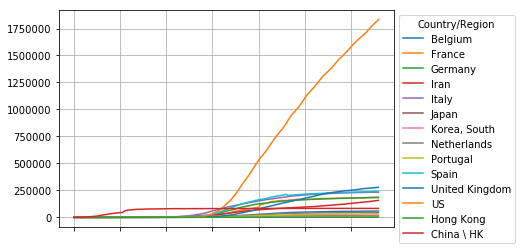

In [18]:
axes = donnees.set_index("Country/Region").drop(columns = ["Province/State"]).transpose().plot()
leg = axes.get_legend()
leg.set_bbox_to_anchor((1, 1))
plt.grid(True)

Nous retrouvons la même allure de courbe que sur le site du SCMP.

## Echelle logarithmique

Les mêmes données sont tracés en echelle logarithmique

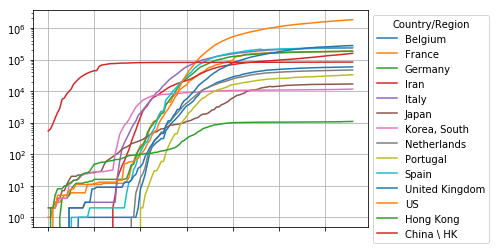

In [19]:
axes = donnees.set_index("Country/Region").drop(columns = ["Province/State"]).transpose().plot()
leg = axes.get_legend()
leg.set_bbox_to_anchor((1, 1))
axes.set_yscale('log')
plt.grid(True)

Ces données sont bien cohérentes avec les données affichées. 
Pour tous les pays considéré au dessus, l'augmentation des nombres de cas confirmés ralentie. Il faut faire attention avec le second graph en echelle logarithmique.

Cependant il m'est dificille de dire beaucoup plus de chose à ce sujet. Certaines limites apparaissent : 
- peut on comparer US et France par exemple ? La différence de taille des pays et la démographie est très différente.
- Les politiques de dépistage sont différentes d'un pays à l'autre rendant la comparaison encore plus difficile, selon moi.